<a href="https://colab.research.google.com/github/rishikaranjan/Med_expense/blob/main/Predicting_medical_expense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading Libs**

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px


**Reading Data**

In [3]:
data = pd.read_csv('med-insurance.csv')

In [5]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


**Univariate Analysis**

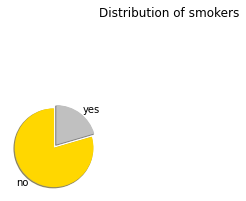

In [ ]:


plt.subplot(1,3,1)

plt.pie(data['smoker'].value_counts().values,
        labels = data['smoker'].value_counts().index,
        colors = ['gold' , 'silver'],
        startangle = 90,
        shadow = True,
        explode = [0.1,0])

plt.suptitle('Distribution of smokers')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



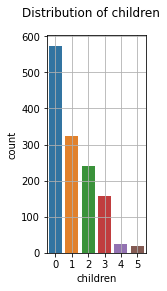

In [ ]:
plt.subplot(1,3,2)
sns.countplot(data['children'])
plt.grid()


plt.suptitle('Distribution of children')

plt.show()



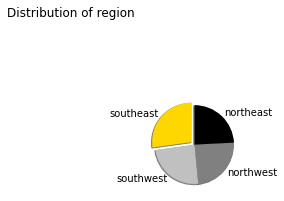

In [ ]:
plt.subplot(1,3,3)

plt.pie(data['region'].value_counts().values,
        labels = data['region'].value_counts().index,
        colors = ['gold' , 'silver' , 'grey' , 'black'],
        startangle = 90,
        shadow = True,
        explode = [0.1,0,0,0])

plt.suptitle('Distribution of region')

plt.show()

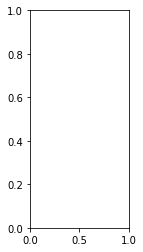

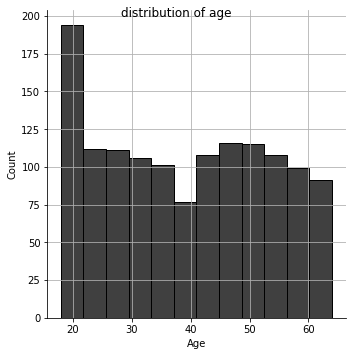

In [7]:
# distribution of age ,bmi and expenses

plt.subplot(1,3,1)
sns.displot(data['age'] , color = 'black')
plt.xlabel('Age')
plt.grid()

plt.suptitle('distribution of age')

plt.show()

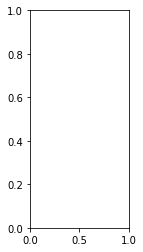

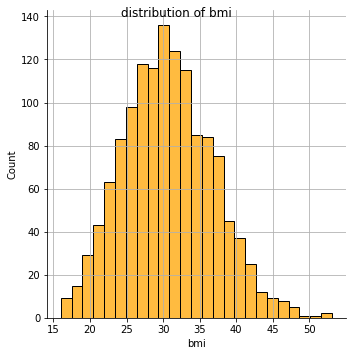

In [8]:
# distribution of age ,bmi and expenses

plt.subplot(1,3,2)
sns.displot(data['bmi'] , color = 'orange')
plt.xlabel('bmi')
plt.grid()

plt.suptitle('distribution of bmi')

plt.show()

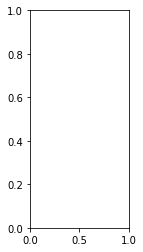

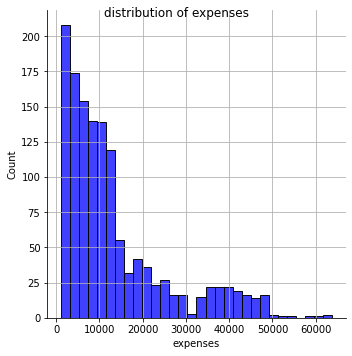

In [6]:
# distribution of age ,bmi and expenses

plt.subplot(1,3,3)
sns.displot(data['expenses'] , color = 'blue')
plt.xlabel('expenses')
plt.grid()

plt.suptitle('distribution of expenses')

plt.show()

**Bivariate Analysis**

In [ ]:

px.scatter(data , y = 'expenses' , 
           x = 'age',
           marginal_y = 'violin' ,
           trendline = 'ols'
           )

In [ ]:
px.scatter(data , y = 'expenses' , 
           x = 'bmi',
           marginal_y = 'violin' ,
           trendline = 'ols'
           )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



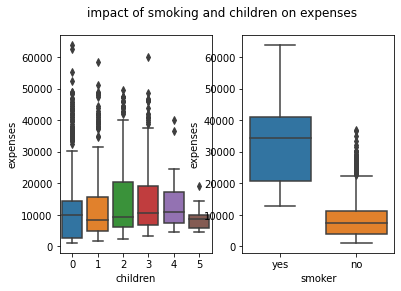

In [ ]:
plt.subplot(1,2,1)
sns.boxplot(data['children'] , data['expenses'])

plt.subplot(1,2,2)
sns.boxplot(data['smoker'] , data['expenses'])

plt.suptitle('impact of smoking and children on expenses')
plt.show()

**Multivariate Analysis**

In [ ]:

px.scatter(data ,
           x = 'expenses' , 
           y = 'bmi',
           facet_row = 'children' ,
           facet_col = 'region',
           color = 'smoker' , 
           trendline = 'ols'
           )

In [ ]:

# bmi age smoker

px.scatter(data , 
           x = 'expenses' , 
           y = 'bmi' , 
           size = 'age' ,
           color = 'smoker' ,
           hover_name = 'expenses'
           )


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



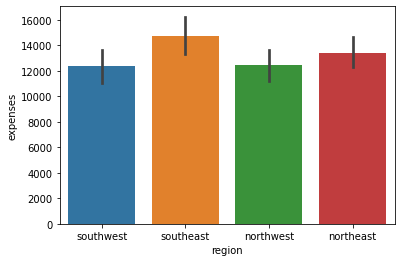

In [4]:
sns.barplot(data['region'] , data['expenses'])

**Encoding Categorical Column**

In [10]:

data['sex'] = data['sex'].replace(('male' , 'female') , (2,1))

data['smoker'] = data['smoker'].replace(('yes' , 'no') , (2,1))

data['region'] = data['region'].replace(('southeast' , 'southwest' , 'northeast' , 'northwest') , (2,1,1,1))


In [11]:
data

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,2,1,16884.92
1,18,2,33.8,1,1,2,1725.55
2,28,2,33.0,3,1,2,4449.46
3,33,2,22.7,0,1,1,21984.47
4,32,2,28.9,0,1,1,3866.86
...,...,...,...,...,...,...,...
1333,50,2,31.0,3,1,1,10600.55
1334,18,1,31.9,0,1,1,2205.98
1335,18,1,36.9,0,1,2,1629.83
1336,21,1,25.8,0,1,1,2007.95


In [12]:
y = data['expenses']

x = data.drop(['expenses'] , axis = 1)

In [13]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.2 , random_state = 0)

print(x_train)

      age  sex   bmi  children  smoker  region
621    37    2  34.1         4       2       1
194    18    2  34.4         0       1       2
240    23    1  36.7         2       2       1
1168   32    2  35.2         2       1       1
1192   58    1  32.4         1       1       1
...   ...  ...   ...       ...     ...     ...
763    27    2  26.0         0       1       1
835    42    2  36.0         2       1       2
1216   40    2  25.1         0       1       2
559    19    2  35.5         0       1       1
684    33    1  18.5         1       1       1

[1070 rows x 6 columns]


In [14]:
print(y_train)

621     40182.25
194      1137.47
240     38511.63
1168     4670.64
1192    13019.16
          ...   
763      3070.81
835      7160.33
1216     5415.66
559      1646.43
684      4766.02
Name: expenses, Length: 1070, dtype: float64


**Feature Scaling**

In [15]:


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


**Linear Regression**

In [16]:


from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train , y_train)

y_pred1 = model1.predict(x_test)


In [18]:
from sklearn.metrics import r2_score , mean_squared_error

mse = mean_squared_error(y_test , y_pred1)
rmse = np.sqrt(mse)
print('rmse score: ' , rmse)

r2_score = r2_score(y_test , y_pred1)
print('r2 score:' , r2_score)

rmse score:  5663.441749764154
r2 score: 0.7984378814790315


**Random Forest Tree**

In [19]:

from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(x_train , y_train)

y_pred2 = model2.predict(x_test)

In [20]:
from sklearn.metrics import r2_score , mean_squared_error

mse = mean_squared_error(y_test , y_pred2)
rmse = np.sqrt(mse)
print('rmse score: ' , rmse)

r2_score = r2_score(y_test , y_pred2)
print('r2 score:' , r2_score)

rmse score:  4371.829474678563
r2 score: 0.8798913001612882


**Gradient Boosting**

In [21]:


from sklearn.ensemble import GradientBoostingRegressor

model3 = GradientBoostingRegressor()
model3.fit(x_train , y_train)

y_pred3 = model3.predict(x_test)

In [22]:
from sklearn.metrics import r2_score , mean_squared_error

mse = mean_squared_error(y_test , y_pred3)
rmse = np.sqrt(mse)
print('rmse score: ' , rmse)

r2_score = r2_score(y_test , y_pred3)
print('r2 score:' , r2_score)

rmse score:  4068.1455780312976
r2 score: 0.8959981631558427


**Ensembling by Averages**

In [23]:


avg_model = (y_pred1 + y_pred2 + y_pred3)/3

from sklearn.metrics import r2_score , mean_squared_error

mse = mean_squared_error(y_test , avg_model)

rmse = np.sqrt(mse)

print('RMSE Score :' , rmse)

r2_score = r2_score(y_test , avg_model)

print('R2 score:' , r2_score)


RMSE Score : 4260.690377378155
R2 score: 0.885920400187339


**Cross Validation**

In [24]:


from sklearn.model_selection import cross_val_score

scores = cross_val_score(model3 , x, y , cv = 5)

print(scores)

[0.88039403 0.79757234 0.88867364 0.8475277  0.85969152]


**Comparing Models**

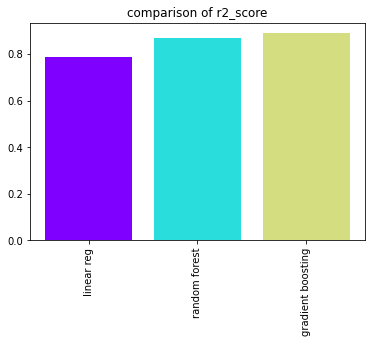

In [25]:


r2_score = np.array([0.79 , 0.87 , 0.89])

labels = np.array(['linar reg' , 'random forest' , 'gradient boosting'])
index = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0,1,4))

plt.bar(range(len(index)) , r2_score[index] , color = color)
plt.xticks(range(0,3) , ['linear reg' , 'random forest' , 'gradient boosting'] , rotation = 90)

plt.title('comparison of r2_score' )
plt.show()

**Building a Predictive System**

In [27]:
input_data = (31,1,25.7,0,1,0)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model3.predict(input_data_reshaped)

print(prediction)

print ('Insurance cost in USD is' , prediction[0])

[58636.29232496]
Insurance cost in USD is 58636.292324963


In [28]:
input_data1 = (31,1,25.7,0,0,0)

input_data1_as_numpy_array = np.asarray(input_data1)

input_data1_reshaped = input_data1_as_numpy_array.reshape(1,-1)

prediction = model3.predict(input_data1_reshaped)

print(prediction)

print ('Insurance cost in USD is' , prediction[0])

[15327.64214672]
Insurance cost in USD is 15327.642146722203
